In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 

In [3]:
# Importamos los módulos específicos
 
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [4]:
from sklearn.linear_model import LogisticRegression
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
import pathlib

pathlib.Path()  # Genera un objeto Unix Path o 

PosixPath('.')

In [6]:
CURRENT_DIR = pathlib.Path().resolve()  # Path local completo
CURRENT_DIR

PosixPath('/home/santi/personalProjects/ML_con_sklearn/ejemplos/examples/notebook')

In [8]:
df = pd.read_csv(CURRENT_DIR.parent.joinpath("data", "heart.csv"))
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
df_features = df.drop(["target"], axis = 1) # el mismo dataframe pero sin la columna target
df_features.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [13]:
 df_target = df['target'] # variables Y

In [14]:
df_features = StandardScaler().fit_transform(df_features) # estandarización de las variables de muestra
df_features

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(df_features, df_target, test_size= 0.3, random_state=42)

In [16]:
# crear el algoritmo pca
# n_components opcional, en caso de no pasar nada, esto será igual a  n_components = min(n_columnas, n_filas)
pca = PCA(n_components= 3)
pca.fit(X_train)


PCA(n_components=3)

In [17]:
# batch_size creación de bloques para no mandar todos los datos al tiempo

ipca = IncrementalPCA(n_components= 3 , batch_size= 10)
ipca.fit(X_train)

IncrementalPCA(batch_size=10, n_components=3)

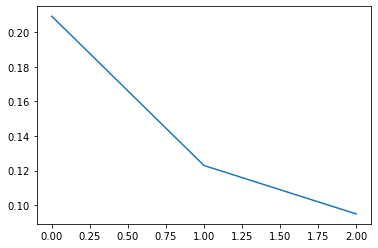

In [18]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

# tenemos tres componentes en el eje x [0,1,2]
# la primera componente aporta mas del 20% de la información, la segunda el 12% y la tercera aporta menos del 10%
# las dos primeras componentes son las que mas información aportan al modelo

In [23]:
# regresión logistica
# solver="1bgfgs" parametro de configuración por defecto para evitar advertencias

logistic = LogisticRegression(solver="lbfgs")

In [20]:
dt_train = pca.transform(X_train)
dt_test = pca. transform(X_test)

In [28]:
logistic.fit(dt_train, Y_train)
log_predic = logistic.predict(dt_test)
print('SCORE PCA:', logistic.score(dt_test, Y_test))

SCORE PCA: 0.7857142857142857


In [29]:
dt_train_ipca = ipca.transform(X_train)
dt_test_ipca = ipca.transform(X_test)

In [30]:
logistic.fit(dt_train_ipca, Y_train)
print('SCORE IPCA', logistic.score(dt_test_ipca,Y_test ))

SCORE IPCA 0.8051948051948052


In [ ]:
#cualquiera de los dos algoritmos tiene un acurracy alto 

In [ ]:
#inicialmente el data set tenía 13 features para hacer la predicción
#con pca reducimos esto a solo 3 features artificiales 